# Summary

This is the second notebook of this study, it is dedicated to build and visualize mask based on encoded pixels of Severstal data. All notebooks follow the same structure:

Summary: a brief explanation of general objectives

Table of Contents: list of related content

Requirements: required packages

Data Loading: input data for analysis

Main activities: selected analysis, transformation or training for this specific notebook


# Requirements

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import os, sys
import csv
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns

# Data loading

In [ ]:
#accessing data in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train_images folder in drive
drive_path = '/content/drive/My Drive/Colab Notebooks/'
train_path = '/content/drive/My Drive/Colab Notebooks/train_images/'

In [ ]:
#creating encoded_df to serve as a list of enconded pixels per class
encoded_df = pd.read_csv(drive_path + 'train.csv')
encoded_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Encoded_df will help us call the encoded pixels faster during mask construction, because df_master has its same information but it is nestled, so I'll keep this dataframe only for this purpose.

In [ ]:
#Loading master dataframe
df_master = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_master.csv')
df_master.head()

,ImageId,Defect,Defect_no,ClassId,EncodedPixels
0,88df5f0d8.jpg,yes,1,[3],['111052 12 111284 36 111517 58 111749 82 1119...
1,71b815a2d.jpg,yes,1,[3],['53666 54 53816 160 54018 214 54274 214 54530...
2,e863b1467.jpg,yes,1,[3],['92673 127 92929 253 93185 253 93441 253 9369...
3,a3fe8d17b.jpg,no,0,[0],NaN
4,8e30601c8.jpg,no,0,[0],NaN


# Conversion Fuctions

The following functions will be used to transform encoded pixels in a color map to be merged in original image. The resulted transformation will let us see tha shape of the defect as well as it neighborhood. Note that the reversal functions are supplied for sanity check purposes.

The main strategy is to use RLE (run-length-enconding) a 1D straight vector to support pixel mapping in images.

In [ ]:
#custom function to build mask from encoded pixels
'''
This function is an rle to mask converter.
You supply the rle string for one mask, along with it's height and width
from the solutions for stage1 and it will return the mask.
'''
def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle2mask(mask_rle, shape=(256,1600)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [ ]:
def build_masks(df, image_name):
    
    depth = 4
    height = 256
    width = 1600
    
    masks = np.zeros((height, width, depth), dtype=np.uint8)
    
    temp = df[df['ImageId'] == image_name]
    
    for idx in temp.index:
        masks[:, :, temp.ClassId[idx]-1] = rle2mask(temp.EncodedPixels[idx], (width, height))
    
    return masks

def build_rles(masks):
    width, height, depth = masks.shape
    
    rles = [mask2rle(masks[:, :, i])
            for i in range(depth)]
    
    return rles

### Color Dictionary

In [ ]:
#color dictionary for defects
# 1 - blue, 
# 2 - purple,
# 3 - yellow , 
# 4 - red
colors = {0: [50, 150, 255],
          1: [200, 50, 200],
          2: [255, 180, 0],
          3: [255, 50, 0]}

### Masks for ClassId = 1

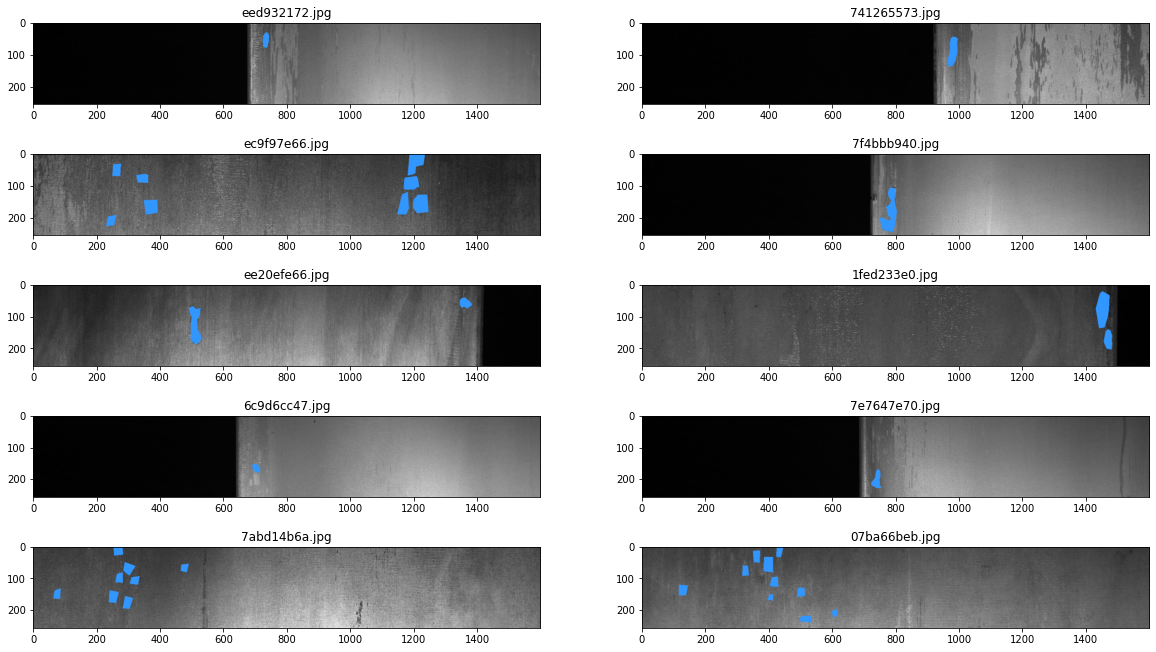

In [ ]:
#exemples of defect class: 1
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

class1 = df_master[df_master['ClassId'] == '[1]']

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class1.ImageId)
    img = cv2.imread(train_path + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        img[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        plt.title(image_name) 
        plt.imshow(img) 
plt.show()

### Masks for ClassId = 2

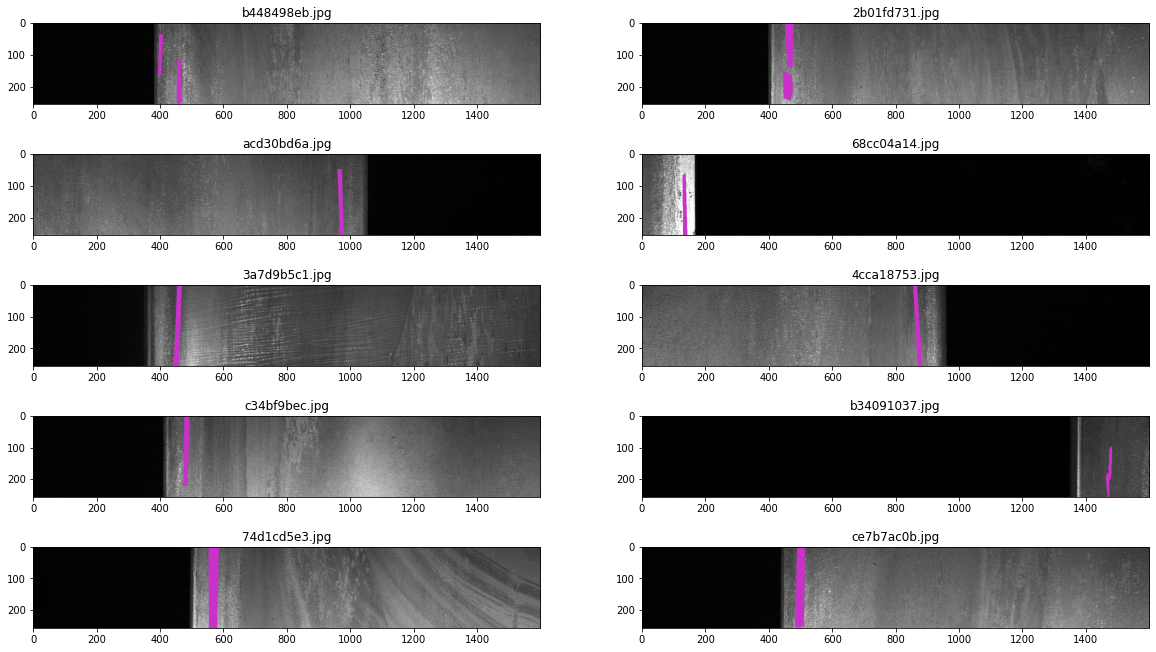

In [ ]:
#exemples of defect class: 2
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

class2 = df_master[df_master['ClassId'] == '[2]']

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class2.ImageId)
    img = cv2.imread(train_path + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        img[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        plt.title(image_name) 
        plt.imshow(img) 
plt.show()

### Masks for ClassId = 3

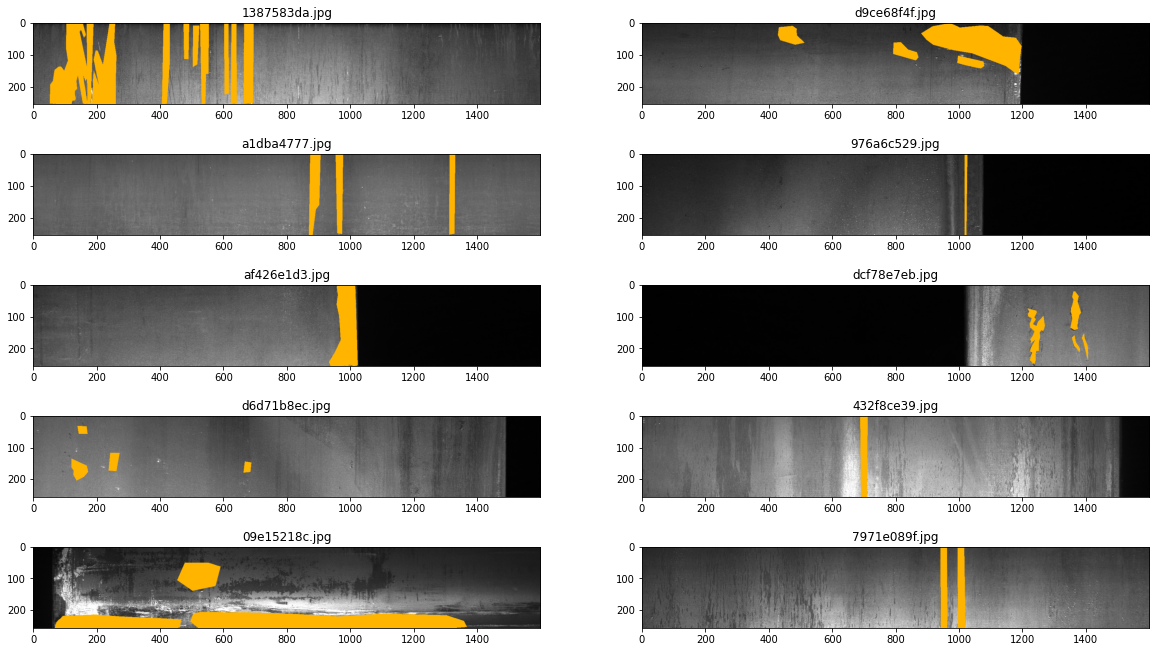

In [ ]:
#exemples of defect class: 3
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

class3 = df_master[df_master['ClassId'] == '[3]']

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class3.ImageId)
    img = cv2.imread(train_path + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        img[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        plt.title(image_name) 
        plt.imshow(img) 
plt.show()

### Masks for ClassId = 4

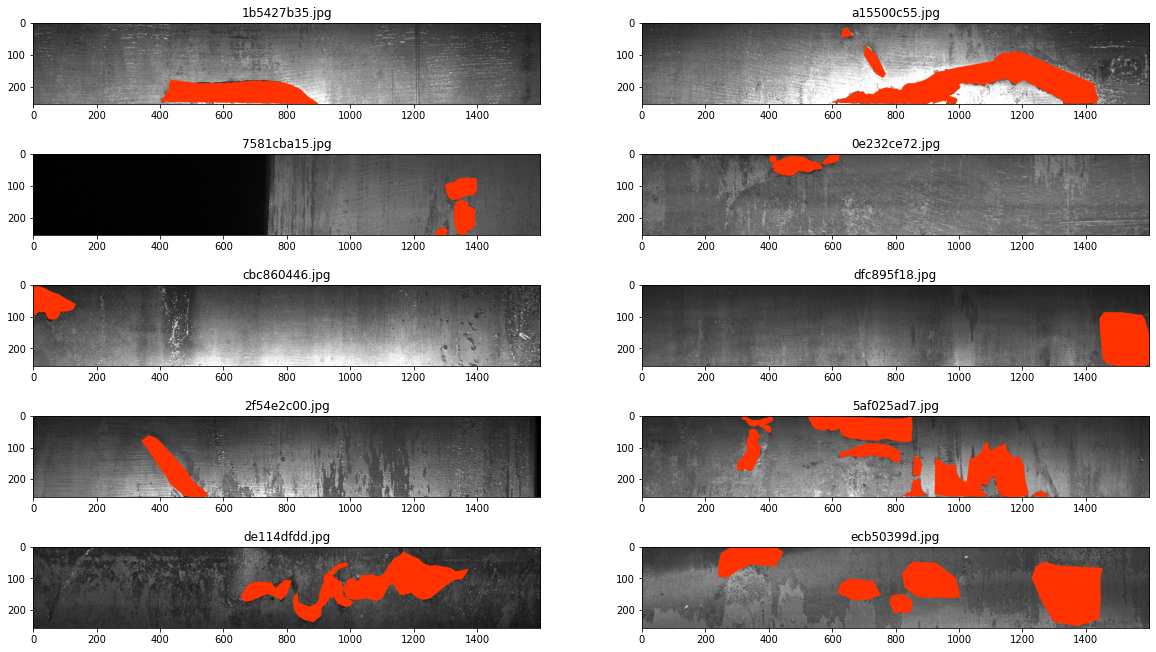

In [ ]:
#exemples of defect class: 4
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

class4 = df_master[df_master['ClassId'] == '[4]']

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class4.ImageId)
    img = cv2.imread(train_path + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        img[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        plt.title(image_name) 
        plt.imshow(img) 
plt.show()

Each class has its own defect signature, class 1 is mostly composed by small squared shaped areas coming together in a given region. Class 2 is composed by vertical traces, they come alone and are very sparse. Class 3 also presents vertical traces, but they are more concentrated and some can be also be in horizontal shape. At last, class 4 can be defined as rounded regions very spread to the plate at any position.

### Masks for Multiclass

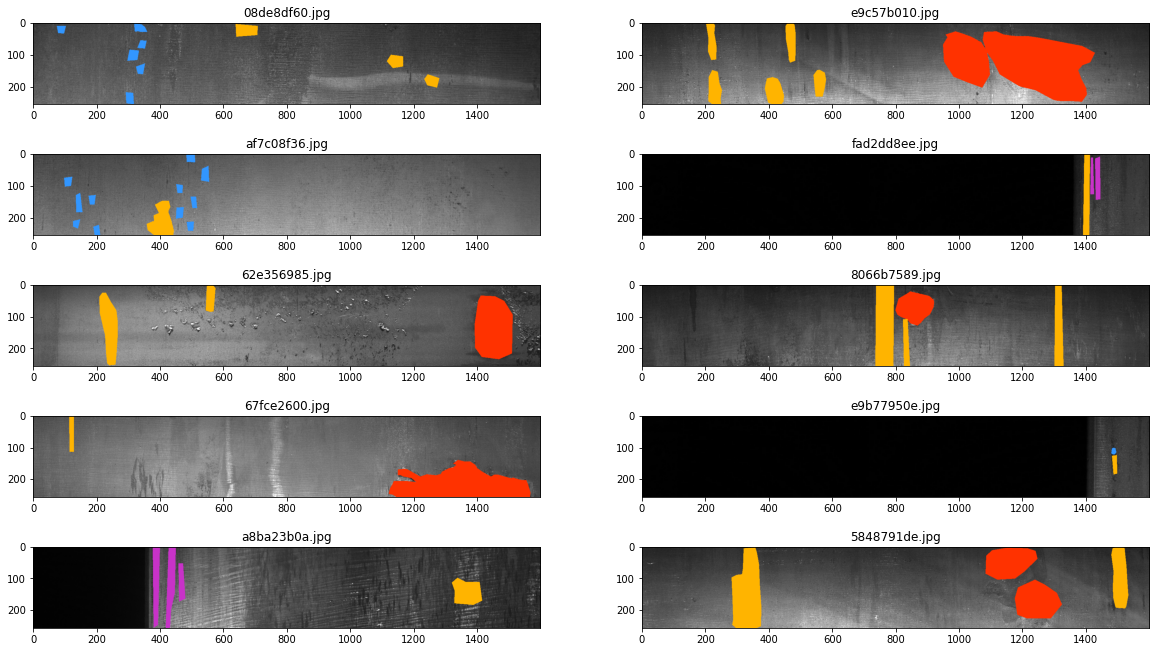

In [ ]:
#exemples of multiclass defect
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

class_multi = df_master[df_master['Defect_no'] >= 2]

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class_multi.ImageId)
    img = cv2.imread(train_path + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        img[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        plt.title(image_name) 
        plt.imshow(img) 
plt.show()

# Pixels Analysis

Pixel count is important can reveal some interesting information with regard to defect area of each class. To make calculation more feasible it's necessary to transform the image background into a full black one RGB (0,0,0). 

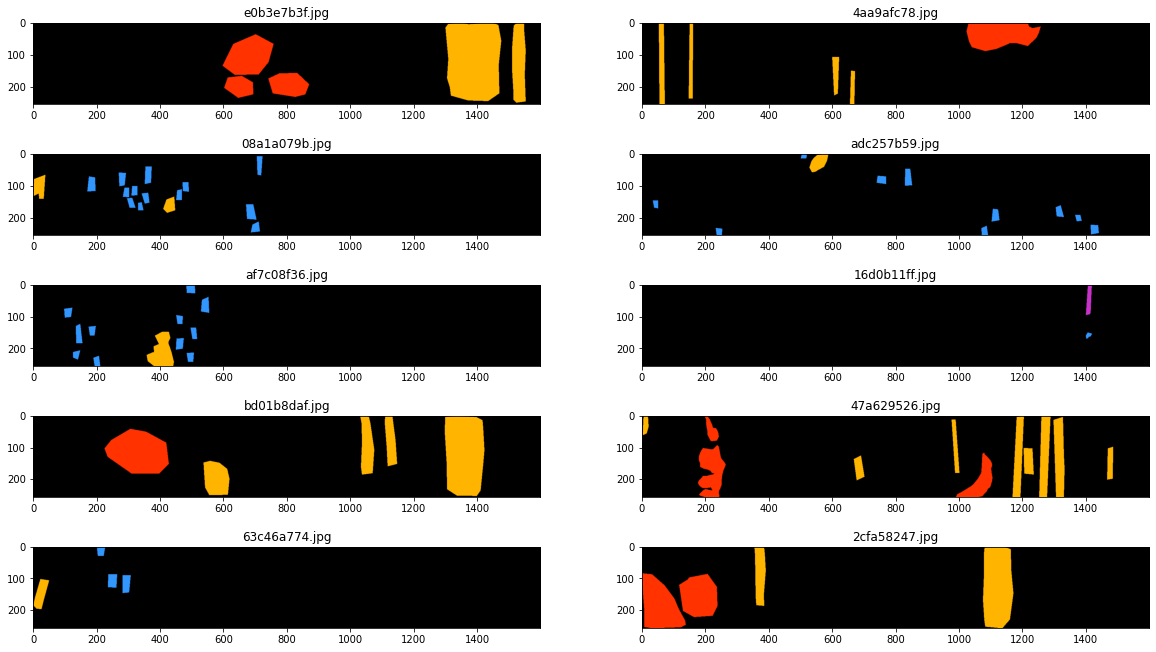

In [ ]:
#exemples of black background tranformation in random images
fig=plt.figure(figsize=(20,120))
columns = 2
rows = 50

#images with 2 or more defects
class_multi = df_master[df_master['Defect_no'] >= 2]

for i in range(1, 10+1):
    fig.add_subplot(rows, columns, i)
    image_name = np.random.choice(class_multi.ImageId)
    #generating an empty mask (256, 1600, 3)
    depth = 3
    height = 256
    width = 1600
    mask = np.zeros((height, width, depth), dtype=np.uint8)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        mask[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        im = Image.fromarray(mask)
        plt.title(image_name) 
        plt.imshow(im) 
plt.show()

### Building New Masks

After the construction new masks (the ones with black background), I can perform a non-zero pixel count, e. g., count every color pixel and then divide by total pixel count of each image. This ratio shows the percentage of defect in a given image.

In [ ]:
#Calcule pixel area ratio for each image in dataset

df_master['Mask_Ratio'] = None

for idx in df_master.index:
    image_name = df_master['ImageId'][idx]
    #generating an empty mask (256, 1600, 3)
    depth = 3
    height = 256
    width = 1600
    mask = np.zeros((height, width, depth), dtype=np.uint8)
    rleToMask = build_masks(encoded_df, image_name)
    for c_id in range(1,5):
        mask[rleToMask[:, :, (c_id-1)]==1] = colors[c_id-1]
        im = Image.fromarray(mask)
        pixels = np.count_nonzero(mask)
        image_area = height * width
        area_ratio = (pixels / image_area) * 100
        df_master['Mask_Ratio'][idx] = area_ratio


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#checking dataset
df_master.head()

,ImageId,Defect,Defect_no,ClassId,EncodedPixels,Mask_Ratio
0,88df5f0d8.jpg,yes,1,[3],['111052 12 111284 36 111517 58 111749 82 1119...,3.1499
1,71b815a2d.jpg,yes,1,[3],['53666 54 53816 160 54018 214 54274 214 54530...,5.51709
2,e863b1467.jpg,yes,1,[3],['92673 127 92929 253 93185 253 93441 253 9369...,20.8296
3,a3fe8d17b.jpg,no,0,[0],NaN,0
4,8e30601c8.jpg,no,0,[0],NaN,0


Below are shown a sequence of operations in order to calculate statistical parameters of each class distribution, namely, mean, median, standard deviation, maximum and minimum. Next, these variable are transcripted to a dataframe for further inspection.

In [ ]:
all_class = df_master[df_master['Defect'] == 'yes']
class1 = df_master[df_master['ClassId'] == '[1]']
class2 = df_master[df_master['ClassId'] == '[2]']
class3 = df_master[df_master['ClassId'] == '[3]']
class4 = df_master[df_master['ClassId'] == '[4]']
class_multi = df_master[df_master['Defect_no'] >= 2]

In [ ]:
rows=['All_data', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_multi']
columns=['source', 'mean', 'median', 'std', 'max', 'min']
stat_df = pd.DataFrame(columns=columns)
stat_df['source'] = rows
stat_df

,source,mean,median,std,max,min
0,All_data,NaN,NaN,NaN,NaN,NaN
1,Class_1,NaN,NaN,NaN,NaN,NaN
2,Class_2,NaN,NaN,NaN,NaN,NaN
3,Class_3,NaN,NaN,NaN,NaN,NaN
4,Class_4,NaN,NaN,NaN,NaN,NaN
5,Class_multi,NaN,NaN,NaN,NaN,NaN


In [ ]:
for idx in stat_df.index:
    if stat_df['source'][idx] == 'All_data':
      stat_df['mean'][idx] = all_class.Mask_Ratio.mean()
      stat_df['median'][idx] = all_class.Mask_Ratio.median()
      stat_df['std'][idx] = all_class.Mask_Ratio.std()
      stat_df['max'][idx] = all_class.Mask_Ratio.max()
      stat_df['min'][idx] = all_class.Mask_Ratio.min()
    elif stat_df['source'][idx] == 'Class_1':
      stat_df['mean'][idx] = class1.Mask_Ratio.mean()
      stat_df['median'][idx] = class1.Mask_Ratio.median()
      stat_df['std'][idx] = class1.Mask_Ratio.std()
      stat_df['max'][idx] = class1.Mask_Ratio.max()
      stat_df['min'][idx] = class1.Mask_Ratio.min()
    elif stat_df['source'][idx] == 'Class_2':
      stat_df['mean'][idx] = class2.Mask_Ratio.mean()
      stat_df['median'][idx] = class2.Mask_Ratio.median()
      stat_df['std'][idx] = class2.Mask_Ratio.std()
      stat_df['max'][idx] = class2.Mask_Ratio.max()
      stat_df['min'][idx] = class2.Mask_Ratio.min()
    elif stat_df['source'][idx] == 'Class_3':
      stat_df['mean'][idx] = class3.Mask_Ratio.mean()
      stat_df['median'][idx] = class3.Mask_Ratio.median()
      stat_df['std'][idx] = class3.Mask_Ratio.std()
      stat_df['max'][idx] = class3.Mask_Ratio.max()
      stat_df['min'][idx] = class3.Mask_Ratio.min()
    elif stat_df['source'][idx] == 'Class_4':
      stat_df['mean'][idx] = class4.Mask_Ratio.mean()
      stat_df['median'][idx] = class4.Mask_Ratio.median()
      stat_df['std'][idx] = class4.Mask_Ratio.std()
      stat_df['max'][idx] = class4.Mask_Ratio.max()
      stat_df['min'][idx] = class4.Mask_Ratio.min()
    elif stat_df['source'][idx] == 'Class_multi':
      stat_df['mean'][idx] = class_multi.Mask_Ratio.mean()
      stat_df['median'][idx] = class_multi.Mask_Ratio.median()
      stat_df['std'][idx] = class_multi.Mask_Ratio.std()
      stat_df['max'][idx] = class_multi.Mask_Ratio.max()
      stat_df['min'][idx] = class_multi.Mask_Ratio.min()

### Statistics

In [ ]:
stat_df

,source,mean,median,std,max,min
0,All_data,12.1565,5.64624,17.6303,179.805,0.0561523
1,Class_1,3.2164,2.48218,2.65488,22.927,0.213135
2,Class_2,2.4916,2.12183,1.45352,10.2708,0.231445
3,Class_3,12.8643,5.99756,19.016,179.805,0.0561523
4,Class_4,17.2609,12.4595,15.2689,94.1309,0.239746
5,Class_multi,18.6143,13.3442,16.2094,117.14,0.597168


Note that all_data refers to all data with at least 1 defect mixed together, it's here only for comparison reasons. As discussed above, Class_1 is composed by small squared shapes hence, in general, it presents a little pixel total area. Class_2 has an even smaller area compared to Class_1 due to its long thin shaped vertical traces very sparsely distributed. However, Class_3 and Class_4 presents a higher mean due to larger defect area and more dense concentration of pixels along the plate. As expected, Class_multi has the highest mean due to more than one defect per plate.

By the analysis of mininum and maximum, it's possible to see that each class can be present since low percentages to medium-high percentages. Hence, it's not safe to establish a direct relationship between area of defect and classes itself.

Moreover, in cases with more than one defect per plate, there's no pre-determined pattern of how much area each class will occup. This being said, the proposed classification system will be constructed using only single class images to predict which class certain plate belongs to.